# Tutorial 1: exploring audio files with explibrosa

#### By B.L. de Vries and V. van Hees

We will use the following standard packages. 
- matplotlib to plot data. 
- os to access the operating system and files

In [1]:
import matplotlib.pyplot as plt
import os

Then we also need to import the explibrosa package. Before you can do this you need to install it. See the readme file in the github repo. (https://github.com/emrecdem/explibrosa)

In [ ]:
import explibrosa

 This notebook is generated with explibrosa version:

In [34]:
explibrosa.__version__

'0.0.0.dev1'

For this tutorial we use an audio file from the IEMOCAP dataset (https://sail.usc.edu/iemocap/). If you want to run this notebook download the dataset and take an audio file from it. Then alter the ```audio_file``` variable to point to your audio file on disk.

In [35]:
audio_file = os.path.join("..", "..", "data", "Audiospoor-3.wav")
os.path.isfile(audio_file)

True

Using the explibrosa package we can get some basic information on the audio file using the ```get_info``` function:

In [37]:
explibrosa.get_info(audio_file)

{'#frames': 133869568, 'Sample freq (kHz)': 44.1, 'duration (min)': 50.6}

We will now generate time_series for the three features implemented at this point. In other words, we will generate these features as function of time. The current features implemented are RMS energy, zero crossing, and pitch. You generate them like this:

In [4]:
time_series = explibrosa.get_feature_time_series(audio_file)

Running librosa (no results found on disk)
RMS energy
     6.06 seconds
Zero crossing
     12.5 seconds
Pitches
     131.56 seconds
  Pitches smoothing
     135.76 seconds
TOTAL execution time: 2.26 min


If you want to save the results to disk and not wait everytime you want to access the timeseries. You can give the function a directory where it will save the timeseries in a csv file.

In [11]:
save_audio_features_to = 'data'
time_series = explibrosa.get_feature_time_series(audio_file, save_audio_features_to)

Running librosa (no results found on disk)
RMS energy
     16.05 seconds
Zero crossing
     32.83 seconds
Pitches
     283.25 seconds
  Pitches smoothing
     286.05 seconds
TOTAL execution time: 4.88 min


The next time you want the timeseries you can give the function the directory where they are saved and the function will read them in instead of calculating them again. (If you want to overwrite the previous results use the parameter ```force_run = True```).

In [12]:
time_series = explibrosa.get_feature_time_series(audio_file, save_audio_features_to)

File found on disk, reading in:  data\Audiospoor-3_features.csv


The output of the ```get_feature_time_series``` is a pandas dataframe and looks like this:

In [13]:
time_series.head()

,pitch,rmse,timestamp,zrc
0,553.226624,0.094246,0.00,0.026005
1,559.988068,0.087158,0.01,0.061466
2,566.121760,0.090962,0.02,0.073286
3,571.039104,0.102708,0.03,0.068558
4,574.148248,0.118395,0.04,0.059102


Plotting the timeseries of the different features gives this:

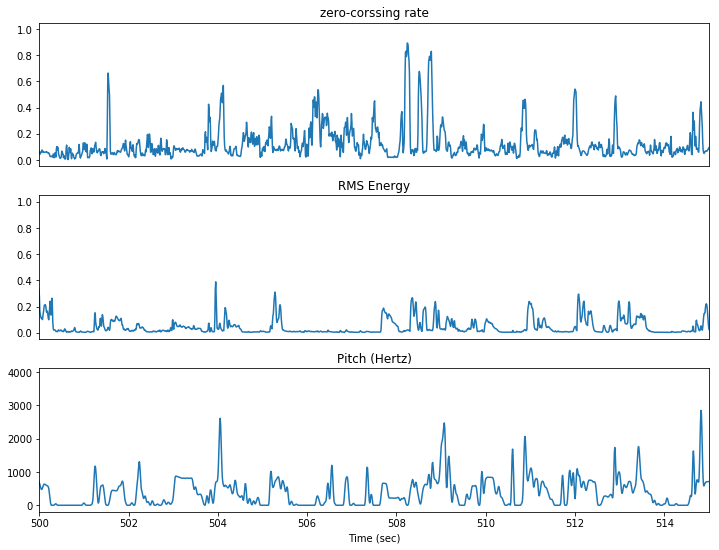

In [38]:
t_frame = time_series["timestamp"]
rmse = time_series["rmse"]
zrc = time_series["zrc"]
pitch_smoothtrack = time_series["pitch"]

plt.figure(figsize=(12, 9))

xl, xl2 = 500,515

plt.subplot(3, 1, 2)
plt.plot(t_frame, rmse)
plt.title('RMS Energy')
plt.xlim(xl, xl2)
plt.xticks([])

plt.subplot(3, 1, 3)
plt.plot(t_frame, pitch_smoothtrack)
plt.title('Pitch (Hertz)')
plt.xlim(xl, xl2)
plt.xlabel("Time (sec)")
#plt.xticks([])

plt.subplot(3, 1, 1)
plt.plot(t_frame, zrc)
plt.title('zero-corssing rate')
plt.xlim(xl, xl2)
plt.xticks([])


plt.show()


Now we generate detections from the time_series. Now it checks if the feature is above a centain threshold and then marks that part as a detection of that feature. The function ```get_detections``` returns a dataframe with columns ```start``` and ```end``` that list the start and end time of a detection. The ```feature``` column lists the name of the detected feature.

In [7]:
detections = explibrosa.get_detections(time_series)

In [8]:
detections.head()

,end,feature,start
0,7.97,pitch,7.85
1,15.30,pitch,15.22
2,20.80,pitch,20.49
3,23.25,pitch,23.18
4,26.24,pitch,26.22


Currently there are three features implemented:

In [39]:
set(detections["feature"])

{'pitch', 'rmse', 'zrc'}

We can now inspect the detections, we take the RMS energy as an example. The figure below shows the timeseries in blue and the detections in red. The grey horizontal line shows the threshold for the detection.

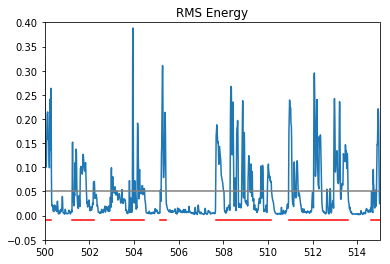

In [40]:
plt.plot(t_frame, rmse)
plt.title('RMS Energy')

plt.axhline(0.05, color="grey")

for index, row in detections[detections["feature"]=="rmse"].iterrows():
    start, end = row["start"], row["end"]
    plt.plot([start, end], [-0.01, -0.01], color="red")
    
plt.xlim(xl, xl2)
plt.ylim(-0.05, 0.4)
    
plt.show()

Elan is a video annotation tool (https://tla.mpi.nl/tools/tla-tools/elan/) and you can output an elan file with the detection using ```write_elan_file``` function. The second argument is the video elan should use to show with the detections. The file ```Ses02F_impro01.avi``` also comes from the IEMOCAP database and belongs to the audio file we used before. The third argument is the file name and path where to save the elan file.

In [41]:
explibrosa.write_elan_file(detections, 
                           os.path.join("data", "Ses02F_impro01.avi"),
                           os.path.join(save_audio_features_to, "Ses02F_impro01.eaf")
                          )